To-do</br>
load the data</br>
check for missing data</br>
do EDA, check the coorelation between each dat point</br>
encode and scale the data</br>
choose and build models</br>
evaluate the models</br>
do feature selection and emgineering</br>
re-train the model and stack it using stacking model or voting model</br>
clean the test data</br>
do what was done to the trainf data</br>
generate predictions using the ensembled model</br>
print out submissions.</br>


In [1]:
#installing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import numpy  as np

In [2]:
#reading thre training data
train = pd.read_csv("train.csv")
train.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250


In [3]:
#reading the test dat
test = pd.read_csv("test.csv")
test.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes


In [4]:
#checking infromation about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [5]:
#for test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model         36183 non-null  object
 3   model_year    36183 non-null  int64 
 4   milage        36183 non-null  int64 
 5   fuel_type     36183 non-null  object
 6   engine        36183 non-null  object
 7   transmission  36183 non-null  object
 8   ext_col       36183 non-null  object
 9   int_col       36183 non-null  object
 10  accident      36183 non-null  object
 11  clean_title   36183 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


the catch here is how to encode the data properly so as not to cause any form of data leakage

<p>Checking for missing data</p>

In [6]:
#check for missing data
train.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [7]:
#for the test data
test.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

<p>reset index to id</p>

In [8]:
train.set_index('id', inplace=True)
train.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250


In [9]:
#for test
test.set_index('id', inplace=True)
test.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
id,,,,,,,,,,,
54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes


Some EDA babies

fro the feture engineering, i will divide the engine column further using excel <br/>
horsepower <br/>cylinder volume <br/>engine type<br/>cranshaft configuration <br/>turbo charging

using regex to divide the engine feature into more features to help the model understand the data better

In [10]:
#checking the shape of the train data
train.shape

(54273, 12)

In [11]:
#shape of test data
test.shape

(36183, 11)

In [12]:
#describing thr train data
train.describe()

,model_year,milage,price
count,54273.000000,54273.000000,5.427300e+04
mean,2015.091979,72746.175667,3.921844e+04
std,5.588909,50469.490448,7.282634e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,32268.000000,1.550000e+04
50%,2016.000000,66107.000000,2.800000e+04
75%,2019.000000,102000.000000,4.500000e+04
max,2024.000000,405000.000000,2.954083e+06


In [13]:
#descibe the test data
test.describe()

,model_year,milage
count,36183.000000,36183.000000
mean,2015.063953,72479.266755
std,5.589336,50714.968252
min,1974.000000,100.000000
25%,2012.000000,31681.000000
50%,2016.000000,65680.000000
75%,2019.000000,102000.000000
max,2024.000000,405000.000000


In [14]:
#split the train set into X and y features
y = train['price']
X = train.drop(columns=['price'],  axis=1)

In [15]:
#checking the y variable
y.head(2)

id
0    11000
1     8250
Name: price, dtype: int64

In [16]:
X.model_year.unique()

array([2018, 2007, 2009, 2022, 2001, 2003, 2014, 2019, 2016, 2017, 2013,
       2021, 2015, 2020, 2012, 2006, 2023, 2011, 2010, 1999, 2004, 1993,
       2002, 2005, 2008, 1995, 1998, 2000, 1997, 1994, 1996, 2024, 1992,
       1974], dtype=int64)

In [17]:
#checking the x varibale
X.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
id,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes


In [18]:
train.fuel_type.unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

<Axes: xlabel='price', ylabel='fuel_type'>

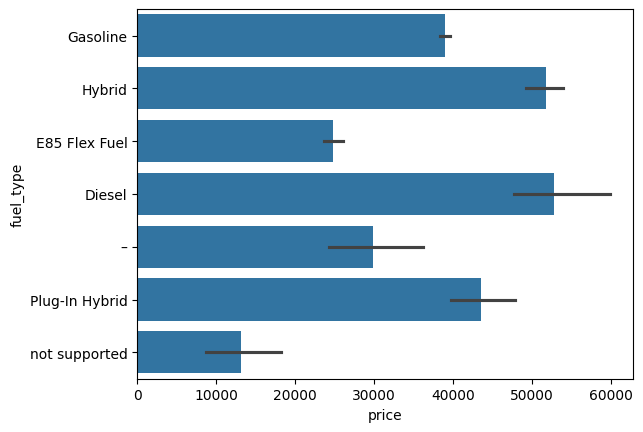

In [19]:
sns.barplot(data=train, y='fuel_type', x='price')

<Axes: xlabel='Count', ylabel='fuel_type'>

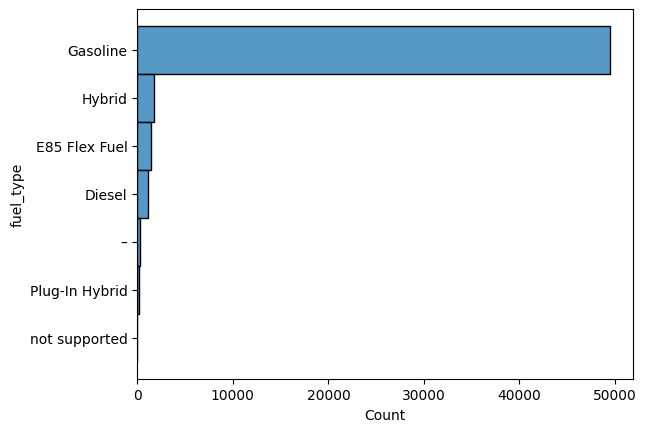

In [20]:
sns.histplot(data=X, y='fuel_type')

In [22]:
train.transmission.unique()

array(['10-Speed A/T', '6-Speed M/T', '6-Speed A/T',
       'Transmission w/Dual Shift Mode', 'A/T', '5-Speed M/T',
       '7-Speed A/T', '5-Speed A/T', '8-Speed A/T',
       'Transmission Overdrive Switch', '9-Speed Automatic',
       '7-Speed M/T', '10-Speed Automatic', '6-Speed Automatic', 'M/T',
       '5-Speed Automatic', 'CVT Transmission', '9-Speed A/T',
       '8-Speed Automatic', '4-Speed A/T', 'Automatic', '1-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed DCT Automatic',
       'Automatic CVT', '7-Speed Automatic',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic',
       '6-Speed Automatic with Auto-Shift', '6-Speed Manual',
       '7-Speed Manual',
       '6-Speed Electronically Controlled Automatic with O',
       '1-Speed Automatic', '10-Speed Automatic with Overdrive',
       '8-Speed Manual', '2-Speed A/T', 'CVT-F', '–', 'F',
       '9-Speed Automatic with Auto-Shift', '7-Speed', 'Variable',
       'SCHEDULED FOR OR IN PRODUCTION', '6-Spe

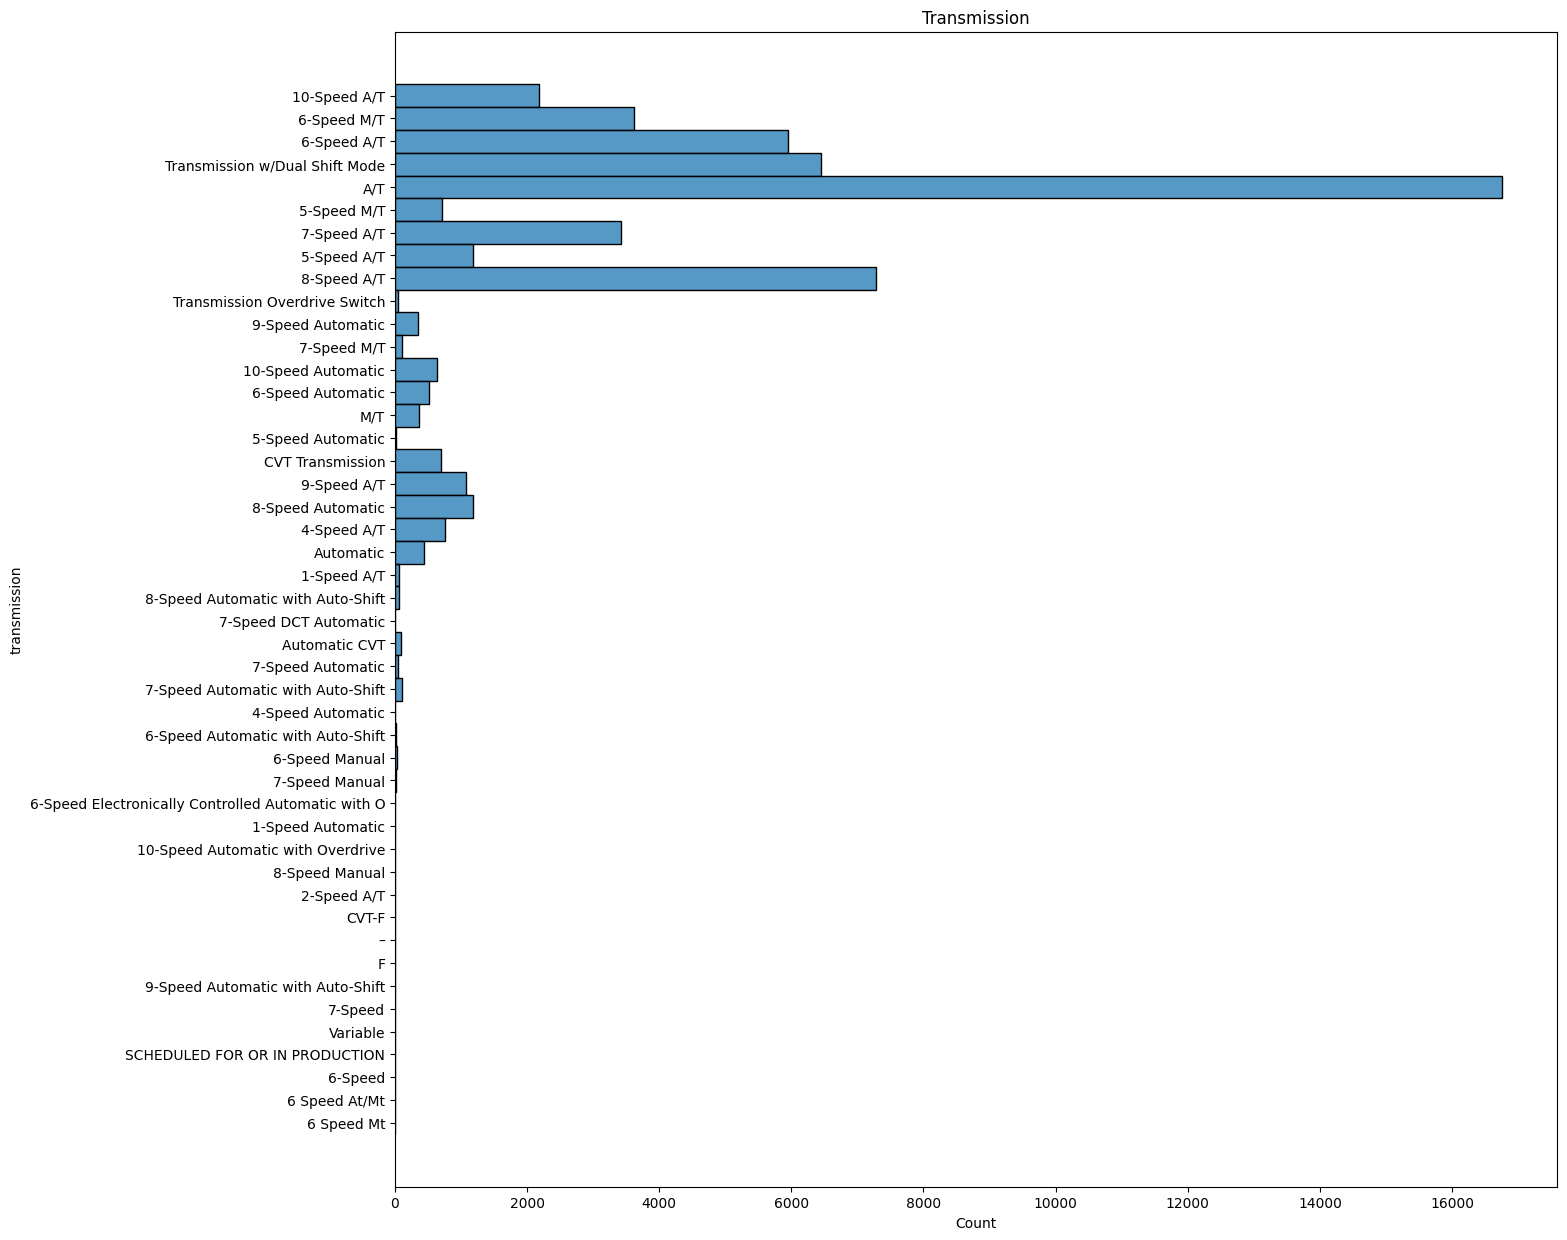

In [23]:
plt.figure(figsize=(15,15))
sns.histplot(y= X['transmission'])
plt.title('Transmission')
plt.show()

In [24]:
X.drop(columns=['clean_title'], inplace=True, axis=1)
X.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident'],
      dtype='object')

In [25]:
#replace invalid data in each column
X['fuel_type'] = X['fuel_type'].replace('-', np.nan)
X['transmission'] = X['transmission'].replace('-', np.nan)
X['ext_col'] = X['ext_col'].replace('-', np.nan)
X['int_col'] = X['int_col'].replace('-', np.nan)

In [26]:
#split into to numeric and categorical variable
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns
print(num_cols, cat_cols)

Index(['model_year', 'milage'], dtype='object') Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident'],
      dtype='object')


In [27]:
def replace_outliers_with_mean(X, column='milage', threshold=1.5):
    """
    Replaces outliers in the specified column of a DataFrame with the mean of the column.
    
    Parameters:
    X (pd.DataFrame): The input DataFrame.
    column (str): The column to check for outliers.
    threshold (float): The threshold for outlier detection (default is 1.5).
    
    Returns:
    pd.DataFrame: The DataFrame with outliers replaced by the mean.
    """
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outlier_mask = (X[column] < lower_bound) | (X[column] > upper_bound)
    mean_value = X[column].mean()
    X.loc[outlier_mask, column] = mean_value

    return X

In [28]:
# Replace outliers with the mean
X_cleaned = replace_outliers_with_mean(X, 'milage')
X.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_7356\4113081362.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '72746.17566745896' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[outlier_mask, column] = mean_value


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident
id,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349.0,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported
1,BMW,335 i,2007,80000.0,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported


In [82]:
#replace outliers with mean for test data
test_cleaned = replace_outliers_with_mean(test, 'milage')
test.head(2)

C:\Users\HP\AppData\Local\Temp\ipykernel_7356\4113081362.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '72479.26675510599' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[outlier_mask, column] = mean_value


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,horsepower,displacement,cylinders
id,,,,,,,,,,,,,,
54273,Mercedes-Benz,E-Class E 350,2014,73000.0,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,302.0,3.5,V6 Cylinder
54274,Lexus,RX 350 Base,2015,128032.0,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,275.0,3.5,V6 Cylinder


In [29]:
#using regex to split the engine feature
# Function to split the engine column
def split_engine(engine):
    hp_match = re.search(r'(\d+(\.\d+)?)HP', engine)
    displacement_match = re.search(r'(\d+(\.\d+)?)L', engine)
    cylinders_match = re.search(r'\b(V\d+ Cylinder|Straight \d+ Cylinder|\d+ Cylinder)\b', engine)

    horsepower = hp_match.group(1) if hp_match else np.nan
    displacement = displacement_match.group(1) if displacement_match else np.nan
    cylinders = cylinders_match.group(0) if cylinders_match else np.nan

    return pd.Series([horsepower, displacement, cylinders])



In [30]:

# Apply the function to the engine column
X[['horsepower', 'displacement', 'cylinders']] = X['engine'].apply(split_engine)

In [31]:
X.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,horsepower,displacement,cylinders
id,,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349.0,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,375.0,3.5,V6 Cylinder
1,BMW,335 i,2007,80000.0,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,300.0,3.0,Straight 6 Cylinder


In [32]:
#using regex to split the test set
test[['horsepower', 'displacement', 'cylinders']] = test['engine'].apply(split_engine)

In [33]:
#checking the test data
test.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,horsepower,displacement,cylinders
id,,,,,,,,,,,,,,
54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,302.0,3.5,V6 Cylinder
54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,275.0,3.5,V6 Cylinder


In [34]:
#check for missing values
X.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
horsepower      4057
displacement     606
cylinders       4175
dtype: int64

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         54273 non-null  object 
 1   model         54273 non-null  object 
 2   model_year    54273 non-null  int64  
 3   milage        54273 non-null  float64
 4   fuel_type     54273 non-null  object 
 5   engine        54273 non-null  object 
 6   transmission  54273 non-null  object 
 7   ext_col       54273 non-null  object 
 8   int_col       54273 non-null  object 
 9   accident      54273 non-null  object 
 10  horsepower    50216 non-null  object 
 11  displacement  53667 non-null  object 
 12  cylinders     50098 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.8+ MB


In [36]:
#change the data type for both the train and test set
X['displacement'] = X['displacement'].astype('float')
X['horsepower'] = X['horsepower'].astype('float')
test['displacement'] = test['displacement'].astype('float')
test['horsepower'] = test['horsepower'].astype('float')

In [40]:
#redefining the num and cat col lists
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [41]:
#filling the missing data in the train set
X[num_cols] = X[num_cols].apply(lambda x: x.fillna(x.mean()), axis=0)
test[num_cols] = test[num_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

In [43]:
for col in cat_cols:
      mode  =X[col].mode()[0]
      X[col].fillna(mode,inplace=True)
      test[col].fillna(mode,inplace=True)

In [44]:
X.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
horsepower      0
displacement    0
cylinders       0
dtype: int64

In [45]:
test.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
horsepower      0
displacement    0
cylinders       0
dtype: int64

In [46]:
#split the training data into train and eval sets
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, random_state=30)

Data Encoding

In [47]:
#encoding the categorical data
from category_encoders import TargetEncoder
target_encoder = TargetEncoder()
X_train_encoded = target_encoder.fit_transform(X_train[cat_cols], y_train)
X_train_encoded.head(2)

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,cylinders
id,,,,,,,,,
31020,40465.536164,44322.089068,39100.933798,43338.279703,52654.613699,38371.215022,51374.995104,44368.727055,39999.342794
39157,40465.536164,32927.169048,39100.933798,20791.092141,46295.582946,45181.314034,41611.817352,25592.356631,24544.138544


In [48]:
#for the eval data
X_eval_encoded = target_encoder.transform(X_eval[cat_cols])
X_eval_encoded.head(2)

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,cylinders
id,,,,,,,,,
18818,22969.515738,16175.949239,39100.933798,15300.20824,29814.795634,45181.314034,27181.078576,44368.727055,31395.098454
52108,40465.536164,40734.371067,39100.933798,44492.81514,52654.613699,38371.215022,56035.069590,44368.727055,24544.138544


In [49]:
#join the encoded data and the numeric data together
train_joined = X_train[num_cols].join(X_train_encoded)
train_joined.head(2)

,model_year,milage,horsepower,displacement,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,cylinders
id,,,,,,,,,,,,,
31020,2021,46000.0,335.0,3.0,40465.536164,44322.089068,39100.933798,43338.279703,52654.613699,38371.215022,51374.995104,44368.727055,39999.342794
39157,2016,55000.0,240.0,2.0,40465.536164,32927.169048,39100.933798,20791.092141,46295.582946,45181.314034,41611.817352,25592.356631,24544.138544


In [50]:
#for the eval
eval_joined = X_eval[num_cols].join(X_eval_encoded)
eval_joined.head(2)

,model_year,milage,horsepower,displacement,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,cylinders
id,,,,,,,,,,,,,
18818,2008,100900.0,261.0,4.0,22969.515738,16175.949239,39100.933798,15300.20824,29814.795634,45181.314034,27181.078576,44368.727055,31395.098454
52108,2022,10500.0,255.0,2.0,40465.536164,40734.371067,39100.933798,44492.81514,52654.613699,38371.215022,56035.069590,44368.727055,24544.138544


Data Scaling

In [51]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(train_joined)
scaled_X_train

array([[ 1.05595103, -0.52689651,  0.03032776, ...,  1.44927889,
         0.59949526,  0.04929142],
       [ 0.16033848, -0.33320267, -0.88339324, ...,  0.29865067,
        -1.6680699 , -1.23122258],
       [ 0.5185835 , -0.9788488 ,  1.13641108, ...,  0.29865067,
         0.59949526, -0.66359824],
       ...,
       [-2.34737667,  0.65678806, -0.88339324, ...,  0.29865067,
         0.59949526, -1.23122258],
       [-0.55615156,  0.87200343, -0.9795744 , ..., -1.34776   ,
         0.59949526,  0.04929142],
       [ 0.87682852, -0.96808803,  1.64617121, ..., -1.40206766,
         0.59949526,  0.04929142]])

In [52]:
#scaling the eval data
scaled_X_eval = scaler.fit_transform(eval_joined)
scaled_X_eval

array([[-1.26039862,  0.64914296, -0.67742209, ..., -1.40953584,
         0.6021831 , -0.65913837],
       [ 1.23829983, -1.29004165, -0.73519643, ...,  2.03171762,
         0.6021831 , -1.23085724],
       [ 0.70286445,  0.06138125,  0.853598  , ...,  1.47593671,
         0.6021831 ,  0.92168518],
       ...,
       [ 0.70286445, -0.38385897,  0.853598  , ..., -1.35457821,
         0.6021831 , -0.65913837],
       [ 1.23829983, -0.98391219,  0.00333611, ..., -1.40953584,
         0.6021831 ,  0.92168518],
       [-1.79583401,  1.31198372, -0.35003415, ..., -1.40953584,
        -1.66062448,  0.92168518]])

In [53]:
#checking the shape of the data
print(scaled_X_train.shape)
print(scaled_X_eval.shape)

(37991, 13)
(16282, 13)


Training the models

In [61]:
#importing the neccesary libraries
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#evaluation
from sklearn.metrics import root_mean_squared_error
# Optimizer (Hyperparameter optimization, here using Optuna as an example)
import optuna
# Stacking Regressor , voting regressor and random forest regressor
from sklearn.ensemble import  VotingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


In [55]:
#initializing the models
catboost_model = CatBoostRegressor(verbose=0)
lightgbm_model = LGBMRegressor(learning_rate=0.001)
random_forest_model = RandomForestRegressor()
xgboost_model = XGBRegressor()
decision_tree_model = DecisionTreeRegressor()
SVR_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
gradient_boost_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=1.0)
linear_model = LinearRegression()

In [56]:
#fit each base line model
catboost_model.fit(scaled_X_train, y_train)
lightgbm_model.fit(scaled_X_train, y_train)
xgboost_model.fit(scaled_X_train, y_train)
random_forest_model.fit(scaled_X_train, y_train)
decision_tree_model.fit(scaled_X_train, y_train)
SVR_model.fit(scaled_X_train, y_train)
gradient_boost_model.fit(scaled_X_train, y_train)
lasso_model.fit(scaled_X_train, y_train)
ridge_model.fit(scaled_X_train, y_train)
linear_model.fit(scaled_X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1470
[LightGBM] [Info] Number of data points in the train set: 37991, number of used features: 13
[LightGBM] [Info] Start training from score 39404.660183


LinearRegression()

In [57]:
#generate predictions using the baseline models
catboost_pred = catboost_model.predict(scaled_X_eval)
lightgbm_pred = lightgbm_model.predict(scaled_X_eval)
xgboost_pred = xgboost_model.predict(scaled_X_eval)
random_forest_pred = random_forest_model.predict(scaled_X_eval)
decision_tree_pred = decision_tree_model.predict(scaled_X_eval)
SVR_pred = SVR_model.predict(scaled_X_eval)
gradient_boost_pred = gradient_boost_model.predict(scaled_X_eval)
lasso_pred = lasso_model.predict(scaled_X_eval)
ridge_pred = ridge_model.predict(scaled_X_eval)
linear_pred = linear_model.predict(scaled_X_eval)

In [58]:
#evaluating the models
rsme_catboost = root_mean_squared_error(catboost_pred, y_eval)
rsme_lightgbm = root_mean_squared_error(lightgbm_pred, y_eval)
rsme_random = root_mean_squared_error(random_forest_pred, y_eval)
rsme_xgboost = root_mean_squared_error(xgboost_pred, y_eval)
rsme_decision = root_mean_squared_error(decision_tree_pred, y_eval)
rsme_SVR = root_mean_squared_error(SVR_pred, y_eval)
rsme_gradient = root_mean_squared_error(gradient_boost_pred, y_eval)
rsme_lasso = root_mean_squared_error(lasso_pred, y_eval)
rsme_ridge = root_mean_squared_error(ridge_pred, y_eval)
rsme_linear = root_mean_squared_error(linear_pred, y_eval)

In [60]:
#preddicting the evaluation metrics
print(f"Catboost: {rsme_catboost}")
print(f"LightGBM: {rsme_lightgbm}")
print(f"Random: {rsme_random}")
print(f"Xgboost: {rsme_xgboost}")
print(f"Decison: {rsme_decision}")
print(f"SVR: {rsme_SVR}")
print(f"Gradient: {rsme_gradient}")
print(f"Lasso: {rsme_lasso}")
print(f"Ridge: {rsme_ridge}")
print(f"Linear: {rsme_linear}")

Catboost: 74637.9145625646
LightGBM: 70553.05226993842
Random: 75456.00509408193
Xgboost: 75734.14975152105
Decison: 110723.46689741331
SVR: 71673.30866183672
Gradient: 78916.00843394814
Lasso: 67480.69587587376
Ridge: 67480.65532619742
Linear: 67480.72058273258


using Optuna to tune the models

In [62]:
import optuna

# Define objective function for Lasso
def lasso_objective(trial):
    params = {
        'alpha': trial.suggest_float('alpha', 1e-5, 10.0, log=True)
    }
    
    model = Lasso(**params)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_eval)
    
    return root_mean_squared_error(y_eval, y_pred)

# Define objective function for Ridge
def ridge_objective(trial):
    params = {
        'alpha': trial.suggest_float('alpha', 1e-5, 10.0, log=True)
    }
    
    model = Ridge(**params)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_eval)
    
    return root_mean_squared_error(y_eval, y_pred)

# Define objective function for Linear Regression
def linear_objective(trial):
    model = LinearRegression()
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_eval)
    
    return root_mean_squared_error(y_eval, y_pred)

# Define objective function for SVR
def svr_objective(trial):
    params = {
        'C': trial.suggest_float('C', 1e-5, 10.0, log=True),
        'epsilon': trial.suggest_float('epsilon', 1e-5, 1.0, log=True)
    }
    
    model = SVR(**params)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_eval)
    
    return root_mean_squared_error(y_eval, y_pred)


# Define objective function for XGBoost
def lightgbm_objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
        'verbose_eval': 1  # Set verbosity level here
    }
    
    lightgbm_model = LGBMRegressor(**params)
    lightgbm_model.fit(scaled_X_train, y_train, eval_set=[(scaled_X_eval, y_eval)])
    y_pred = lightgbm_model.predict(scaled_X_eval)
    
    return root_mean_squared_error(y_eval, y_pred)

In [63]:
# Optimize hyperparameters for lasso 
study_lasso = optuna.create_study(direction='minimize')
study_lasso.optimize(lasso_objective, n_trials=30, n_jobs=-1)

# Optimize hyperparameters for ridge
study_ridge = optuna.create_study(direction='minimize')
study_ridge.optimize(ridge_objective, n_trials=30, n_jobs=-1)

#optimize hyperparamters for linear
study_linear = optuna.create_study(direction='minimize')
study_linear.optimize(linear_objective, n_trials=30, n_jobs=-1)

#optimize hyperparamters for svr
study_svr = optuna.create_study(direction='minimize')
study_svr.optimize(svr_objective, n_trials=30, n_jobs=-1)

# Optimize hyperparameters for lightgbm
study_lightgbm = optuna.create_study(direction='minimize')
study_lightgbm.optimize(lightgbm_objective, n_trials=30, n_jobs=-1)

[I 2024-06-14 21:58:07,442] A new study created in memory with name: no-name-6e1ed381-02d5-432e-9fb2-706557cd4c85


[I 2024-06-14 21:58:08,729] Trial 3 finished with value: 67480.68603122291 and parameters: {'alpha': 0.13961558225737505}. Best is trial 3 with value: 67480.68603122291.
[I 2024-06-14 21:58:08,768] Trial 0 finished with value: 67480.70892293823 and parameters: {'alpha': 0.04745195263277345}. Best is trial 3 with value: 67480.68603122291.
[I 2024-06-14 21:58:08,808] Trial 2 finished with value: 67480.40067841057 and parameters: {'alpha': 1.2748856474850174}. Best is trial 2 with value: 67480.40067841057.
[I 2024-06-14 21:58:08,864] Trial 1 finished with value: 67480.69663192471 and parameters: {'alpha': 0.09696585075096953}. Best is trial 2 with value: 67480.40067841057.
[I 2024-06-14 21:58:08,896] Trial 5 finished with value: 67480.70514992515 and parameters: {'alpha': 0.0625923793319056}. Best is trial 2 with value: 67480.40067841057.
[I 2024-06-14 21:58:08,927] Trial 6 finished with value: 67480.71726327186 and parameters: {'alpha': 0.013475384886063816}. Best is trial 2 with value: 

In [64]:
# Get best hyperparameters and their respective scores
best_params_lasso = study_lasso.best_params
best_score_lasso = study_lasso.best_value

best_params_ridge = study_ridge.best_params
best_score_ridge = study_ridge.best_value

best_params_linear = study_linear.best_params
best_score_linear = study_linear.best_value

best_params_svr = study_svr.best_params
best_score_svr = study_svr.best_value

best_params_lightgbm = study_lightgbm.best_params
best_score_lightgbm = study_lightgbm.best_value

In [67]:
#train the models with the best paraneters
lasso_best_model = Lasso(**best_params_lasso, random_state=42)
lasso_best_model.fit(scaled_X_eval, y_eval)

lightgbm_best_model = LGBMRegressor(**best_params_lightgbm, random_state=42)
lightgbm_best_model.fit(scaled_X_eval, y_eval)

ridge_best_model = Ridge(**best_params_ridge, random_state=42)
ridge_best_model.fit(scaled_X_eval, y_eval)

linear_best_model = LinearRegression(**best_params_linear)
linear_best_model.fit(scaled_X_eval, y_eval)

svr_best_model = SVR(**best_params_svr)
svr_best_model.fit(scaled_X_eval, y_eval)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 16282, number of used features: 13
[LightGBM] [Info] Start training from score 38783.941162


SVR(C=9.903841217608402, epsilon=0.8969621246665278)

In [68]:
#evalute the tuned models with optuna
lasso_predictions = lasso_best_model.predict(scaled_X_eval)
lasso_rmse = root_mean_squared_error(y_eval, lasso_predictions)
print(f"Lasso RMSE: {lasso_rmse}")

lightgbm_predictions = lightgbm_best_model.predict(scaled_X_eval)
lightgbm_rmse = root_mean_squared_error(y_eval, lightgbm_predictions)
print(f"Lightgbm RMSE: {lightgbm_rmse}")

ridge_predictions = ridge_best_model.predict(scaled_X_eval)
ridge_rmse = root_mean_squared_error(y_eval, ridge_predictions)
print(f"Ridge RMSE: {ridge_rmse}")

linear_predictions = linear_best_model.predict(scaled_X_eval)
linear_rmse = root_mean_squared_error(y_eval, linear_predictions)
print(f"Linear RMSE: {linear_rmse}")

svr_predictions = svr_best_model.predict(scaled_X_eval)
svr_rmse = root_mean_squared_error(y_eval, svr_predictions)
print(f"SVR RMSE: {svr_rmse}")

Lasso RMSE: 67073.65203354786
Lightgbm RMSE: 62086.11131488704
Ridge RMSE: 67073.64240350164
Linear RMSE: 67073.6416078339
SVR RMSE: 70675.47044173867


In [69]:
#encode the test data
test_encoded = target_encoder.transform(test[cat_cols])
test_encoded.head(2)

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,cylinders
id,,,,,,,,,
54273,47089.309355,32410.444882,39100.933798,29617.093995,29814.795634,38371.215022,27641.883601,44368.727055,31395.098454
54274,31609.781624,23906.470068,39100.933798,32470.805091,52654.613699,31191.855194,41611.817352,44368.727055,31395.098454


In [83]:
#join the encoded data to the numeric data
test_joined = test_cleaned[num_cols].join(test_encoded)
test_joined.head(2)

,model_year,milage,horsepower,displacement,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,cylinders
id,,,,,,,,,,,,,
54273,2014,73000.0,302.0,3.5,47089.309355,32410.444882,39100.933798,29617.093995,29814.795634,38371.215022,27641.883601,44368.727055,31395.098454
54274,2015,128032.0,275.0,3.5,31609.781624,23906.470068,39100.933798,32470.805091,52654.613699,31191.855194,41611.817352,44368.727055,31395.098454


In [84]:
#scale the test data
scaled_test = scaler.fit_transform(test_joined)
scaled_test

array([[-0.19035668,  0.05481197, -0.28434603, ..., -1.34029296,
         0.60030446, -0.66592714],
       [-0.01144207,  1.2233414 , -0.54097819, ...,  0.3206738 ,
         0.60030446, -0.66592714],
       [-0.01144207, -0.39145535, -0.86414463, ...,  1.48147484,
         0.60030446, -1.23116107],
       ...,
       [-0.72710052,  0.96785829, -1.90017819, ..., -1.39508075,
         0.60030446, -1.23116107],
       [ 0.70421638, -0.66713164,  1.12237845, ...,  2.21938086,
         0.60030446, -0.66592714],
       [-0.54818591,  1.96012731, -0.11325791, ...,  0.3206738 ,
        -1.66582138,  0.89696533]])

In [85]:
# Create Voting Regressor with the best models
voting_model = VotingRegressor(estimators=[
    ('ridge', ridge_best_model),
    ('lightgbm', lightgbm_best_model),
    ('linear', linear_best_model),
    ('lasso', lasso_best_model),
    ('svr', svr_best_model)
], n_jobs=-1)

# Train the ensemble model
voting_model.fit(scaled_X_train, y_train)

# Predict
voting_predictions = voting_model.predict(scaled_X_eval)

In [86]:
#evaluate voting regressor
voting_rmse = root_mean_squared_error(y_eval, voting_predictions)
print(f'Voting Regressor RMSE: {voting_rmse}')

Voting Regressor RMSE: 67126.95493515396


training model for submission data

In [87]:
#predict submission price
pred_to_submit = voting_model.predict(scaled_test)

In [88]:
# Create a DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test.index,  # Assuming the test data index can be used as ID
    'price': pred_to_submit
})

In [89]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission5.csv', index=False)
print('Submission file saved as submission.csv')


Submission file saved as submission.csv
